<a href="https://colab.research.google.com/github/SuryARavichan/SUPERVISED-LEARNING-PROJECT/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('telcom.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

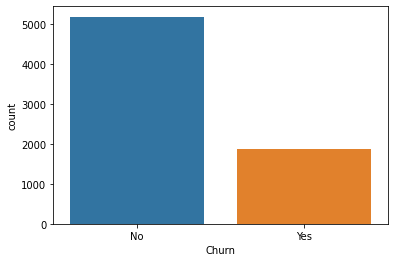

In [8]:
sns.countplot(data=df,x='Churn')

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df.info(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.iloc[15]

customerID                       3655-SNQYZ
gender                               Female
SeniorCitizen                             0
Partner                                 Yes
Dependents                              Yes
tenure                                   69
PhoneService                            Yes
MultipleLines                           Yes
InternetService                 Fiber optic
OnlineSecurity                          Yes
OnlineBackup                            Yes
DeviceProtection                        Yes
TechSupport                             Yes
StreamingTV                             Yes
StreamingMovies                         Yes
Contract                           Two year
PaperlessBilling                         No
PaymentMethod       Credit card (automatic)
MonthlyCharges                       113.25
TotalCharges                        7895.15
Churn                                    No
Name: 15, dtype: object

In [18]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

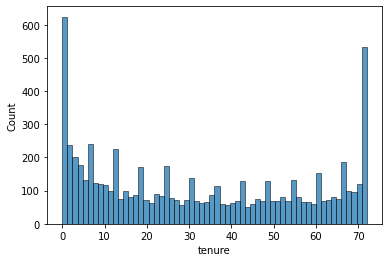

In [20]:
sns.histplot(data=df,x='tenure',bins=60)

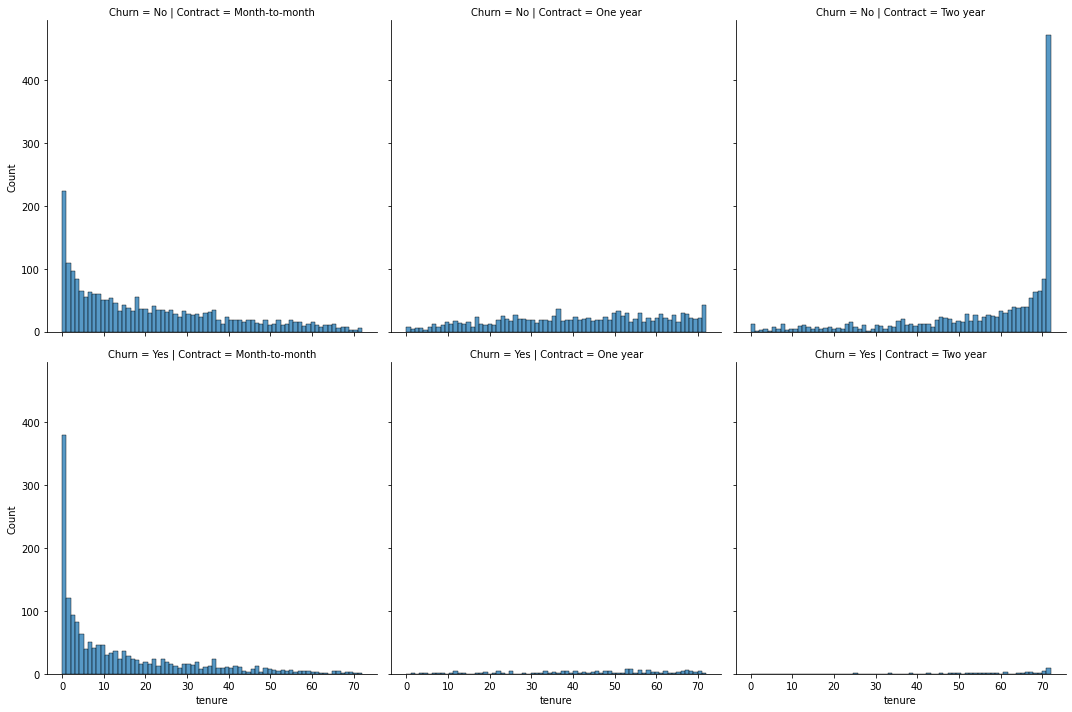

In [24]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

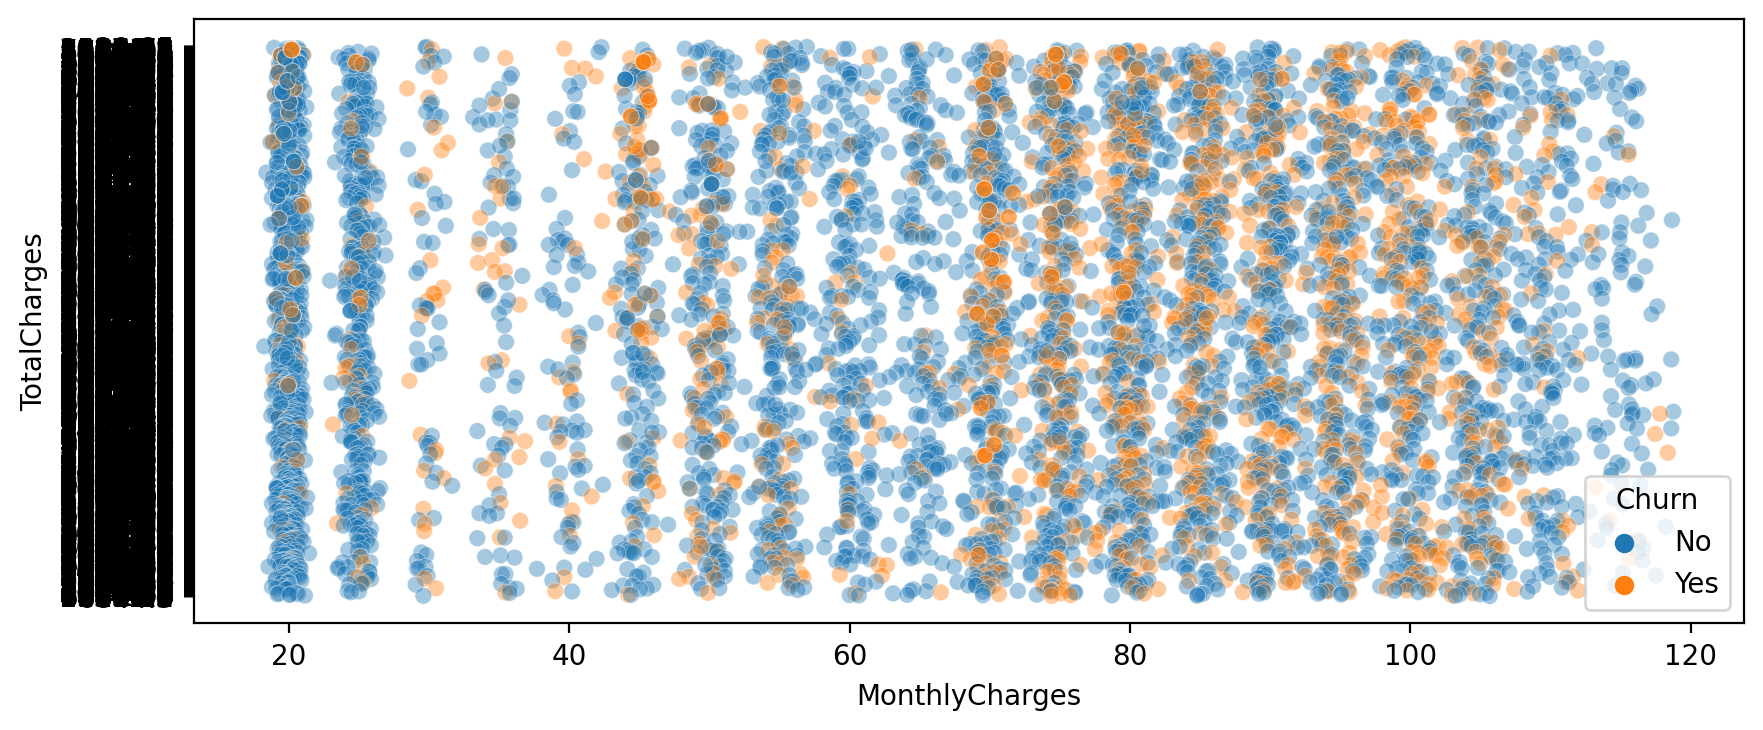

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.4,linewidth=0.3)

In [31]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [32]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [33]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


In [34]:
no_churn

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
gender,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Partner,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Dependents,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
PhoneService,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
MultipleLines,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
InternetService,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineBackup,11,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356


In [35]:
churn_rate = 100*yes_churn / (no_churn+yes_churn)

In [36]:
churn_rate

tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,NaN,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706

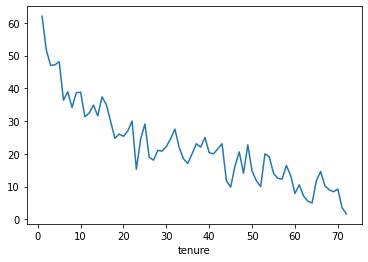

In [38]:
churn_rate.transpose()['customerID'].plot()

In [39]:
def cohort(tenure):
  if tenure<13:
    return '0-12 months'
  elif tenure<25:
    return '12-24 months'
  elif tenure<49:
    return '24-48 months'
  else:
    return 'over 48 months'
  

In [41]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [42]:
df['Tenure Cohort']

0          0-12 months
1         24-48 months
2          0-12 months
3         24-48 months
4          0-12 months
             ...      
7038      12-24 months
7039    over 48 months
7040       0-12 months
7041       0-12 months
7042    over 48 months
Name: Tenure Cohort, Length: 7043, dtype: object

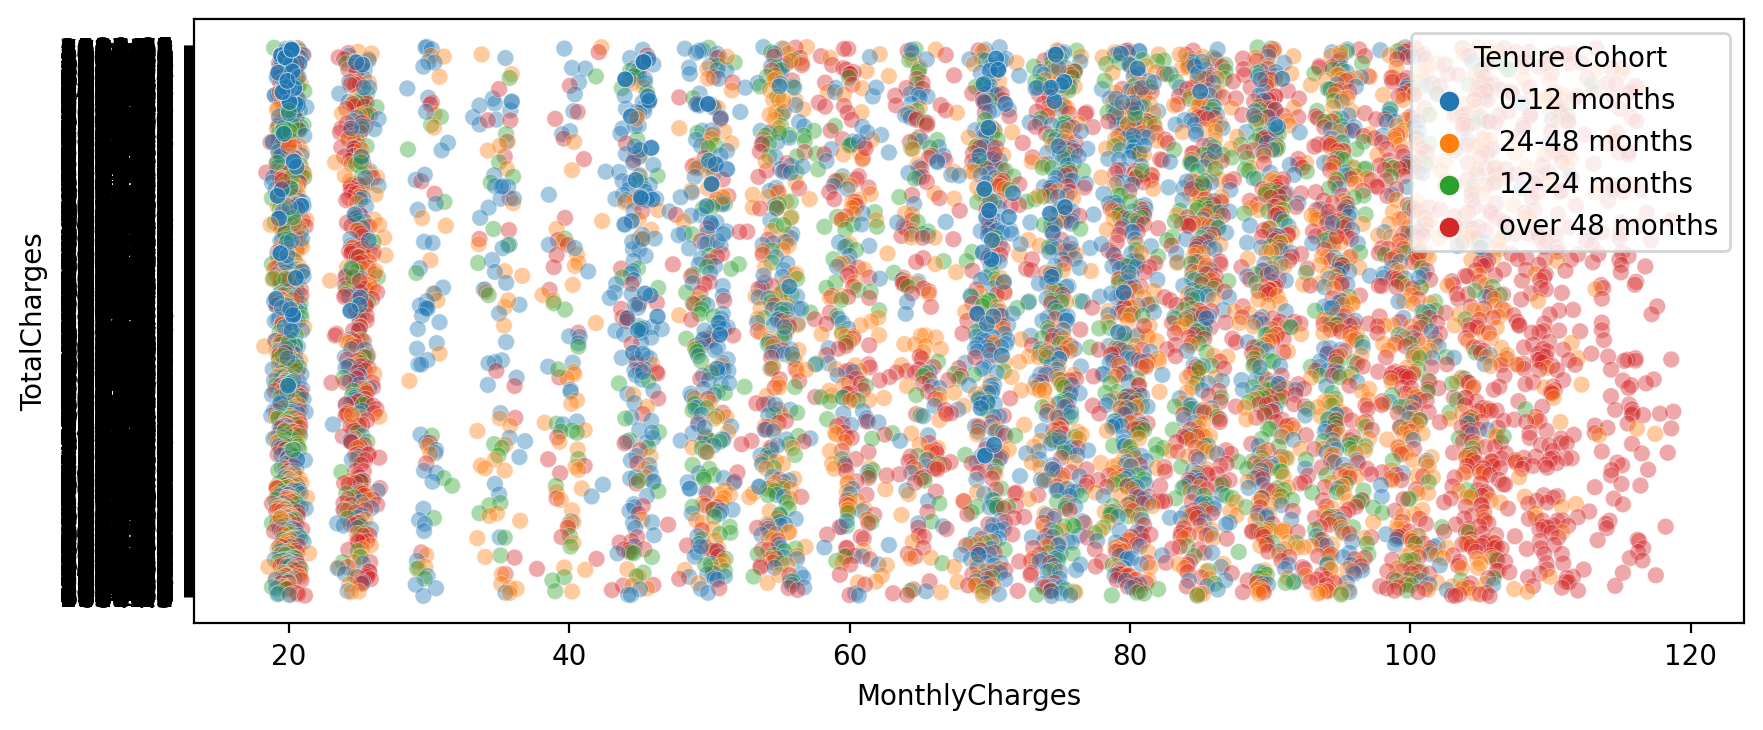

In [44]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.4,linewidth=0.3)

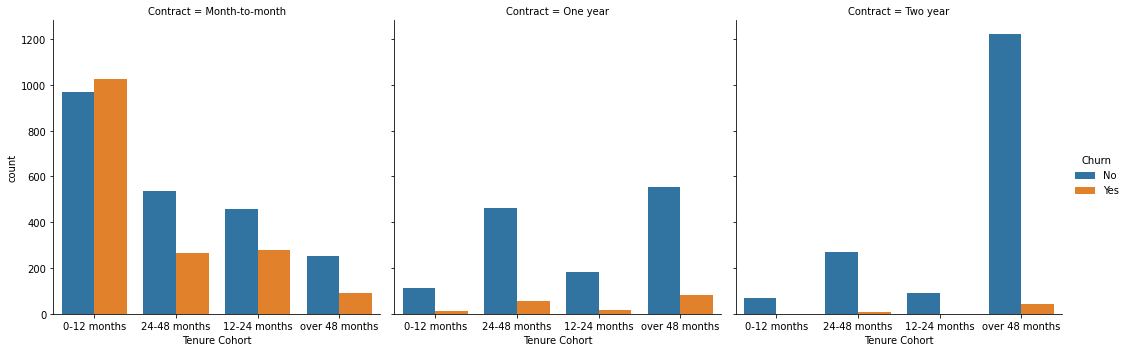

In [49]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract')